In [1]:
# data recorded from 17/05/2019 to 27/11/2019 --> 6 months and 10 days
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_app_usage = pd.read_csv('app_usage.csv')



df_app_usage.dropna(inplace=True)

df_app_usage.info()

C:\Users\a2004\AppData\Local\Temp\ipykernel_19588\315817095.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 0 to 103
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  103 non-null    object 
 1   Unnamed: 0    103 non-null    float64
 2   App name      103 non-null    object 
 3   Usage time    103 non-null    object 
 4   Access count  103 non-null    float64
dtypes: float64(2), object(3)
memory usage: 4.8+ KB


In [2]:
df_app_usage.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)
df_app_usage

,App name,Usage time,Access count
0,Instagram,329:42:37,6141.0
1,WhatsApp,145:21:53,6366.0
2,Phone,101:23:49,3402.0
3,Call of Duty,85:25:57,545.0
4,YouTube,82:48:59,1275.0
...,...,...,...
99,Mobile networks,0:00:04,1.0
100,Lock Screen Stories,0:00:03,1.0
101,WhatsApp Business,0:00:03,1.0
102,Google Podcasts,0:00:01,2.0


In [3]:
df_app_usage.head()

df_app_usage.set_index('App name',inplace=True)

In [4]:
df_app_usage.head()
df_app_usage.columns

df_app_usage.columns=  df_app_usage.columns.str.capitalize()
df_app_usage.rename(index={'App name':'App Name'},inplace=True)


df_app_usage

,Usage time,Access count
App name,,
Instagram,329:42:37,6141.0
WhatsApp,145:21:53,6366.0
Phone,101:23:49,3402.0
Call of Duty,85:25:57,545.0
YouTube,82:48:59,1275.0
...,...,...
Mobile networks,0:00:04,1.0
Lock Screen Stories,0:00:03,1.0
WhatsApp Business,0:00:03,1.0


In [5]:
df_app_usage.dtypes

Usage time       object
Access count    float64
dtype: object

In [6]:
df_app_usage['Access count'] = df_app_usage['Access count'].astype('int')

In [7]:
# https://play.google.com/store/apps/details?id=tamil.nadu.maps.varaipadam&pli=1
# வரைபடம் is a navigation application of the city Tamil in india

df_app_usage.head()
df_app_usage.index = df_app_usage.index.str.replace('வரைபடம்','Tamil Map')


In [8]:
df_app_usage['Usage time'] = df_app_usage['Usage time'].str.split(':').str[0].astype('int')
df_app_usage

,Usage time,Access count
App name,,
Instagram,329,6141
WhatsApp,145,6366
Phone,101,3402
Call of Duty,85,545
YouTube,82,1275
...,...,...
Mobile networks,0,1
Lock Screen Stories,0,1
WhatsApp Business,0,1


In [9]:
df_app_usage.rename(columns={'Usage time':'Usage (hours)'},inplace=True)

In [10]:
df_app_usage.index = df_app_usage.index.str.replace('WhatsApp Business','WhatsApp Business')

In [11]:
zeroUsageTime = df_app_usage[df_app_usage['Usage (hours)'] == 0]

The dataset shows 7 months of statistical data of phone usage. 
any application used less than an hour can be considered an outlier 

In [12]:
df_app_usage = df_app_usage[df_app_usage['Usage (hours)'] > 0]
df_app_usage

,Usage (hours),Access count
App name,,
Instagram,329,6141
WhatsApp,145,6366
Phone,101,3402
Call of Duty,85,545
YouTube,82,1275
Opera Mini,43,501
Amazon Kindle,26,411
Opera,26,230
Chrome,22,1256


In [13]:
df_app_usage = df_app_usage.groupby('App name').sum()
df_app_usage

,Usage (hours),Access count
App name,,
Amazon Kindle,26,411
Amazon Shopping,11,526
Call of Duty,85,545
Camera,3,514
Chrome,22,1256
Clock,2,329
Drive,3,215
Duolingo,7,105
Flipkart,3,111


In [14]:
df_app_usage = df_app_usage.sort_values(by='Usage (hours)', ascending=False)

In [15]:
df_app_usage.to_csv('app_usage_cleaned.csv')

For Data Analysis:
The What 

In [16]:
df_app_usage.describe()

,Usage (hours),Access count
count,34.000000,34.000000
mean,29.029412,900.852941
std,62.861312,1675.423603
min,1.000000,36.000000
25%,2.250000,211.250000
50%,4.500000,333.500000
75%,21.000000,552.500000
max,329.000000,6366.000000


End of app_usage cleaning
 

In [17]:
df_phone_use = pd.read_csv('phone_use_data.csv')


df_phone_use.columns



Index(['Date', 'Check phone count', 'Screen on time'], dtype='object')

In [18]:
df_phone_use.columns = df_phone_use.columns.str.strip('""')

In [19]:
df_phone_use.set_index('Date',inplace=True)

In [20]:
df_phone_use.dropna(inplace=True)

In [21]:
df_phone_use['Check phone count'] =  df_phone_use['Check phone count'].astype('int')

In [22]:
df_phone_use.columns.str.capitalize()

Index(['Check phone count', 'Screen on time'], dtype='object')

In [23]:
import numpy as np

df_phone_use['Screen on time'] = df_phone_use['Screen on time'].str.split(':').str[0].astype('float') + df_phone_use['Screen on time'].str.split(':').str[1].astype('float')/60
df_phone_use['Screen on time'] = np.ceil(df_phone_use['Screen on time']).astype('int')
df_phone_use

,Check phone count,Screen on time
Date,,
27/11/2019,30,4
26/11/2019,55,4
25/11/2019,79,6
24/11/2019,68,6
23/11/2019,66,6
...,...,...
21/05/2019,47,13
20/05/2019,34,4
19/05/2019,80,6


In [24]:
df_phone_use.to_csv('phone_use_data_cleaned.csv')

In [25]:
df_phone_use =pd.read_csv('phone_use_data_cleaned.csv')

df_phone_use = df_phone_use[df_phone_use['Date'] != '27/11/2019']

df_phone_use.to_csv('phone_use_data_cleaned.csv',index=False)


Data Analysis:
The what




total screen time in days:
1214 hours ~ 50 days 

In [26]:
df_phone_use['Screen on time'].sum() /24

50.583333333333336

How many times the user checked his phone

In [27]:
df_phone_use['Check phone count'].sum() 

14090

End Phone use Data


In [28]:
df_detailed_phone_usage = pd.read_csv('detailed_phone_usage.csv')

df_detailed_phone_usage.columns


Index(['App name', 'Date', 'Time', 'Duration'], dtype='object')

In [29]:
df_detailed_phone_usage.dtypes

App name    object
Date        object
Time        object
Duration    object
dtype: object

In [30]:
df_detailed_phone_usage['App name'] = df_detailed_phone_usage['App name'].str.replace('வரைபடம்','Tamil Map')


In [31]:
df_detailed_phone_usage.set_index('Date',inplace=True)


In [32]:
df_detailed_phone_usage.dropna(inplace=True)
df_detailed_phone_usage

,App name,Time,Duration
Date,,,
26/11/2019,App Usage,20:06:27,0:01:01
26/11/2019,Instagram,20:05:43,0:00:23
26/11/2019,Gmail,20:05:02,0:00:35
26/11/2019,Screen on (unlocked),20:05:02,0:00:00
26/11/2019,Screen on (locked),20:05:01,0:00:01
...,...,...,...
17/05/2019,Settings,18:28:30,0:00:03
17/05/2019,Screen on (unlocked),18:28:29,0:00:01
17/05/2019,Screen off (locked),18:25:10,0:03:19


In [33]:
df_detailed_phone_usage

,App name,Time,Duration
Date,,,
26/11/2019,App Usage,20:06:27,0:01:01
26/11/2019,Instagram,20:05:43,0:00:23
26/11/2019,Gmail,20:05:02,0:00:35
26/11/2019,Screen on (unlocked),20:05:02,0:00:00
26/11/2019,Screen on (locked),20:05:01,0:00:01
...,...,...,...
17/05/2019,Settings,18:28:30,0:00:03
17/05/2019,Screen on (unlocked),18:28:29,0:00:01
17/05/2019,Screen off (locked),18:25:10,0:03:19


In [34]:
df_detailed_phone_usage[df_detailed_phone_usage['App name'].str.contains('Screen')]


,App name,Time,Duration
Date,,,
26/11/2019,Screen on (unlocked),20:05:02,0:00:00
26/11/2019,Screen on (locked),20:05:01,0:00:01
26/11/2019,Screen off (locked),20:01:11,0:03:50
26/11/2019,Screen on (unlocked),19:58:44,0:00:00
26/11/2019,Screen on (locked),19:58:43,0:00:01
...,...,...,...
17/05/2019,Screen off (locked),18:28:33,0:00:02
17/05/2019,Screen on (unlocked),18:28:29,0:00:01
17/05/2019,Screen off (locked),18:25:10,0:03:19


**Only get the apps in the app usage data set to work with the same apps**


In [35]:

df_app_usage = df_app_usage.reset_index()

df_detailed_phone_usage = df_detailed_phone_usage[df_detailed_phone_usage['App name'].isin(df_app_usage['App name'])]


In [36]:
df_detailed_phone_usage = df_detailed_phone_usage[df_detailed_phone_usage['App name'] != 'Screen on (unlocked)']
df_detailed_phone_usage = df_detailed_phone_usage[df_detailed_phone_usage['App name'] != 'Screen on (locked)']
df_detailed_phone_usage = df_detailed_phone_usage[df_detailed_phone_usage['App name'] != 'Screen off (locked)']


df_detailed_phone_usage.to_csv('detailed_phone_usage_cleaned.csv')

In [37]:
df_detailed_phone_usage.describe()

,App name,Time,Duration
count,30918,30918,30918
unique,34,24210,1306
top,WhatsApp,0:00:00,0:00:01
freq,6367,28,1672


EXPLAROTARY DATA ANALYSIS:EDA

In [38]:
df_app_usage.describe()

,Usage (hours),Access count
count,34.000000,34.000000
mean,29.029412,900.852941
std,62.861312,1675.423603
min,1.000000,36.000000
25%,2.250000,211.250000
50%,4.500000,333.500000
75%,21.000000,552.500000
max,329.000000,6366.000000


**visualization**



In [39]:
df_app_usage.dtypes

App name         object
Usage (hours)     int32
Access count      int32
dtype: object

Most used apps in Hours
 - instagram takes the lead:329
 - Whatsapp:145
 - Phone (phone calls): 105
 - COD: 85
 - Youtube: 82 

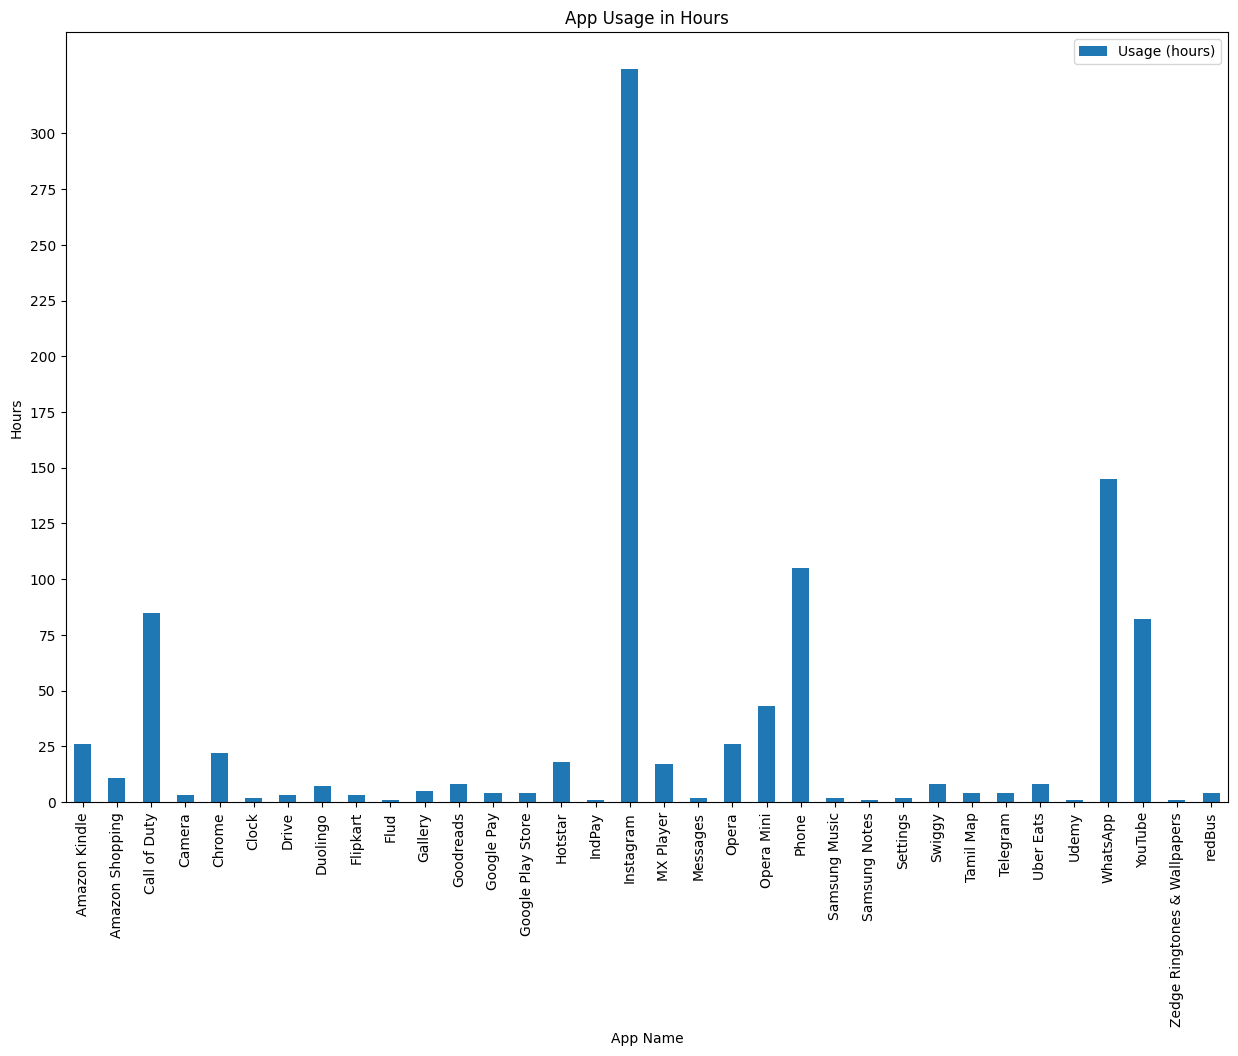

In [40]:
df_app_usage.groupby('App name')['Usage (hours)'].sum().plot(kind='bar',title='App Usage in Hours',legend=True
                                                                             
,figsize=(15,10))
plt.yticks(range(0, 301, 25))  # creates ticks from 0 to 300 with a step of 25
plt.ylabel('Hours')

plt.xlabel('App Name')
plt.show()

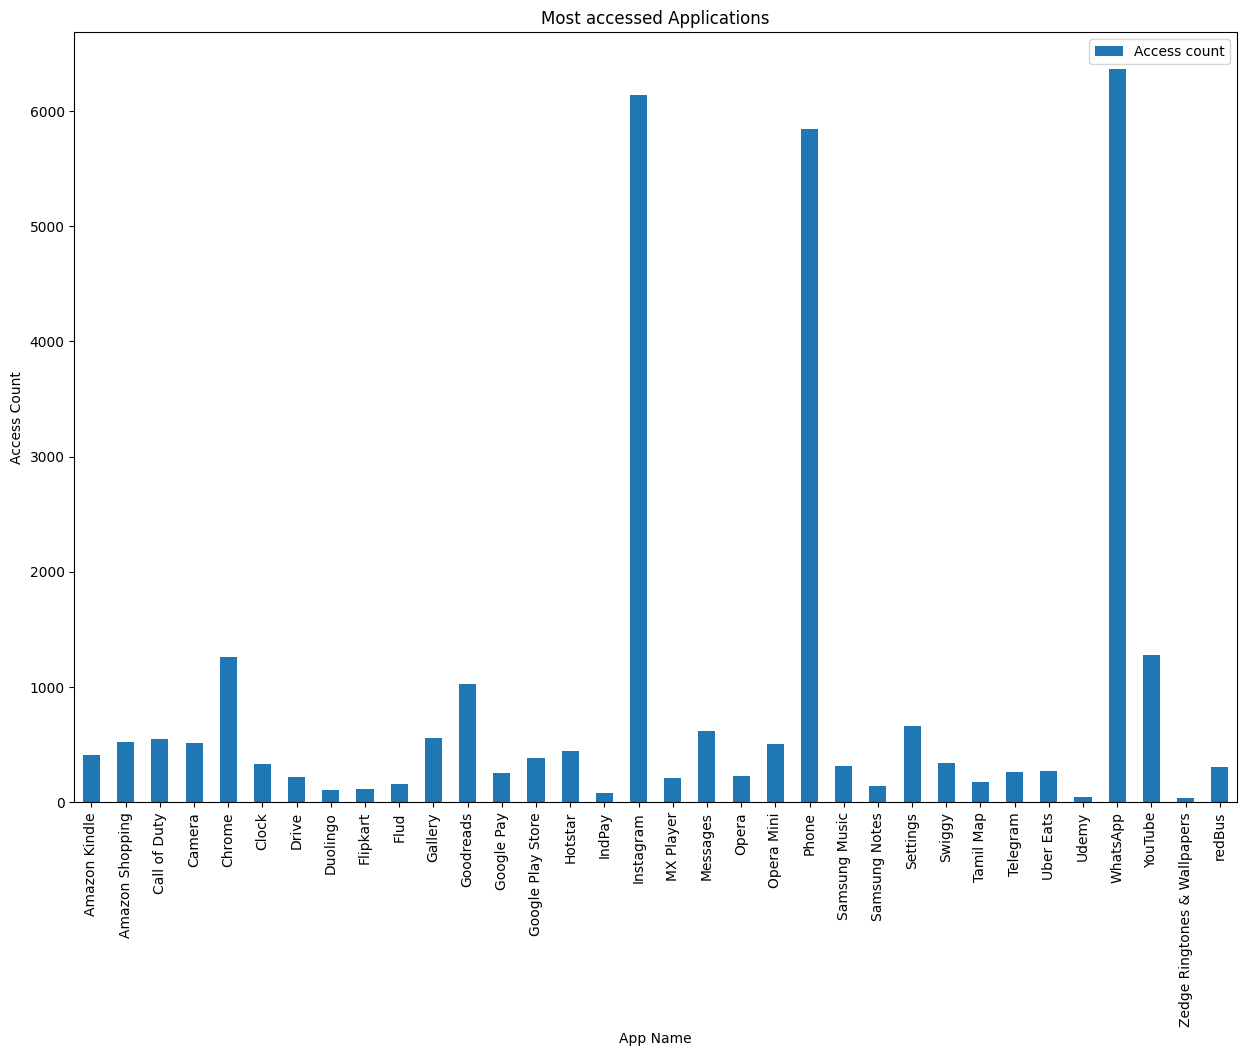

In [41]:
df_app_usage.groupby('App name')['Access count'].sum().plot(kind='bar',title='Most accessed Applications',legend=True
                                                                             
,figsize=(15,10))

plt.ylabel('Access Count')

plt.xlabel('App Name')
plt.show()

most accessed application: this can lead us to ask that is there is a correlation between the access count and usage time ? : "if he accessed the app more frequently does that mean he will spend more time on it ?"

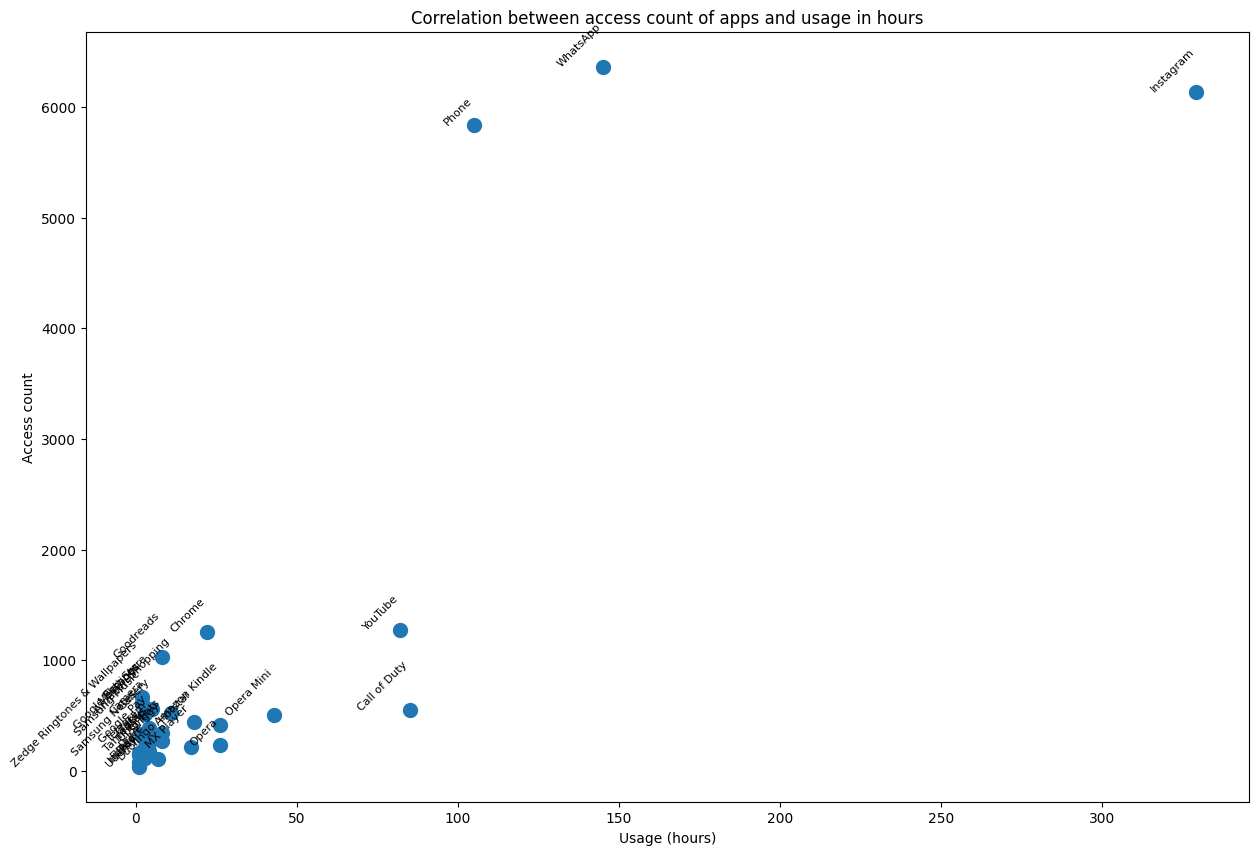

In [42]:
app_usage_viz = df_app_usage.groupby('App name')[['Usage (hours)','Access count']].sum()

plt.figure(figsize=(15,10))
plt.scatter(app_usage_viz['Usage (hours)'], app_usage_viz['Access count'], s=100)  # s=100 makes the bubbles bigger

for i in range(len(app_usage_viz)):
    plt.text(app_usage_viz['Usage (hours)'].iloc[i], app_usage_viz['Access count'].iloc[i], app_usage_viz.index[i], 
             fontsize=8, rotation=45, ha='right')

plt.title('Correlation between access count of apps and usage in hours')
plt.xlabel('Usage (hours)')
plt.ylabel('Access count')
plt.show()

Execuse the clunkiness but this plot was important for Showing the relationship of the three variables: 
THE HIGHER THE ACESS COUNT THE HIGHET THE USAGE HOURS
we see that the user spent most of his time on social media and some times gaming on his phone.

Visualization for phone_use_data: date - check phone count(how many time he chekced his phone) - Screen time


In [43]:
may_DataFrame = df_phone_use[df_phone_use['Date'].str.contains('/05')]
june_DataFrame = df_phone_use[df_phone_use['Date'].str.contains('/06')]
july_DataFrame = df_phone_use[df_phone_use['Date'].str.contains('/07')]
august_DataFrame = df_phone_use[df_phone_use['Date'].str.contains('/08')]
september_DataFrame = df_phone_use[df_phone_use['Date'].str.contains('/09')]
october_DataFrame = df_phone_use[df_phone_use['Date'].str.contains('/10')]
november_DataFrame = df_phone_use[df_phone_use['Date'].str.contains('/11')]

june_DataFrame

,Date,Check phone count,Screen on time
150,30/06/2019,69,8
151,29/06/2019,70,8
152,28/06/2019,60,5
153,27/06/2019,56,8
154,26/06/2019,75,7
155,25/06/2019,59,7
156,24/06/2019,37,5
157,23/06/2019,74,7
158,22/06/2019,80,8
159,21/06/2019,61,5


bar chart showing the total times the user checked his phone


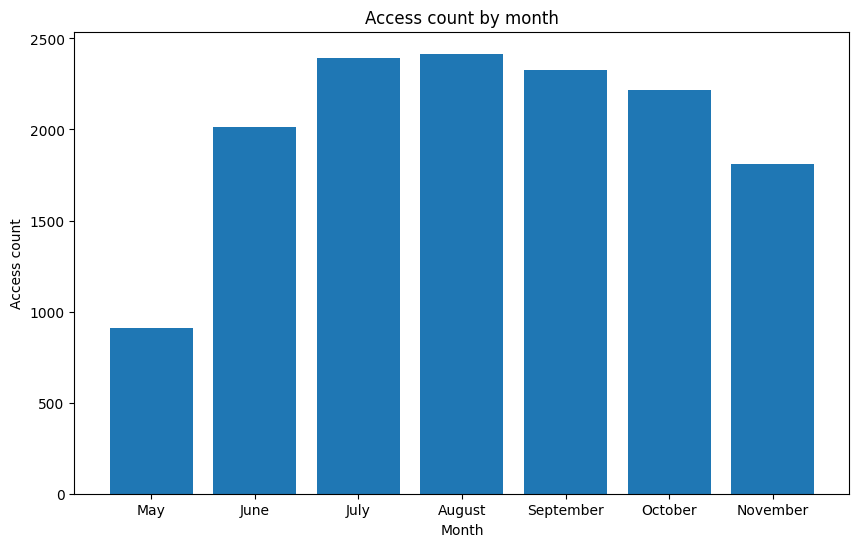

In [44]:

# Create a list of the months DataFrames
dataframes = [may_DataFrame, june_DataFrame, july_DataFrame, august_DataFrame, september_DataFrame, october_DataFrame, november_DataFrame]
months = ['May', 'June', 'July', 'August', 'September', 'October', 'November']

# Calculate the sum of 'check phone count' for each months DataFrame
access_counts = [df['Check phone count'].sum() for df in dataframes]


plt.figure(figsize=(10, 6))
plt.bar(months, access_counts)
plt.title('Access count by month')
plt.xlabel('Month')
plt.ylabel('Access count')
plt.show()

Round the usage time up and simplify it to hours and coonvert it to int to ease work with numerical values

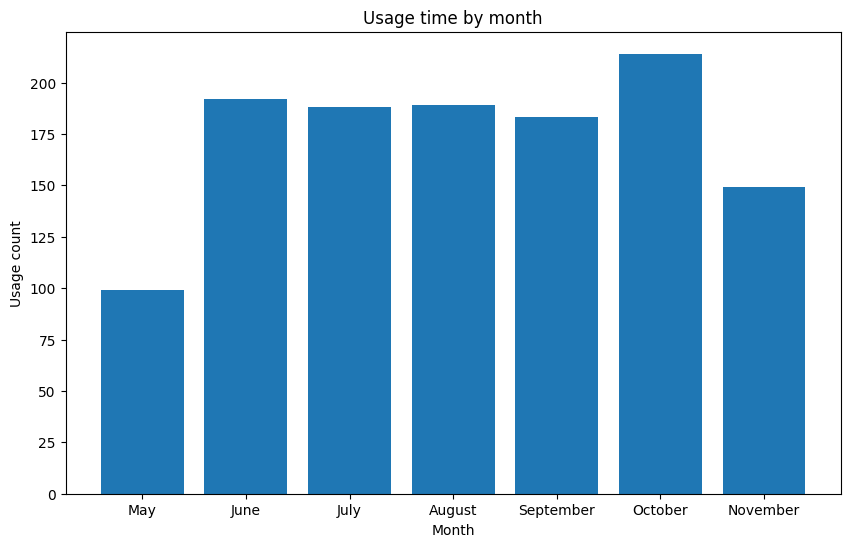

In [45]:

# Calculate the sum of 'check phone count' for each months DataFrame
usage_sum = [df['Screen on time'].sum() for df in dataframes]


plt.figure(figsize=(10, 6))
plt.bar(months, usage_sum)
plt.title('Usage time by month')
plt.xlabel('Month')
plt.ylabel('Usage count')
plt.show()

In [46]:

may_DataFrame = df_detailed_phone_usage[df_detailed_phone_usage.index.str.contains('/05')]
june_DataFrame = df_detailed_phone_usage[df_detailed_phone_usage.index.str.contains('/06')]
july_DataFrame = df_detailed_phone_usage[df_detailed_phone_usage.index.str.contains('/07')]
august_DataFrame = df_detailed_phone_usage[df_detailed_phone_usage.index.str.contains('/08')]
september_DataFrame = df_detailed_phone_usage[df_detailed_phone_usage.index.str.contains('/09')]
october_DataFrame = df_detailed_phone_usage[df_detailed_phone_usage.index.str.contains('/10')]
november_DataFrame = df_detailed_phone_usage[df_detailed_phone_usage.index.str.contains('/11')]





**visualization**: detailed_phone_usage data set |
 most used apps in each month

C:\Users\a2004\AppData\Local\Temp\ipykernel_19588\1759397755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  randomdf['Duration_hours'] = pd.to_timedelta(randomdf['Duration']).dt.total_seconds() / 3600


<Axes: title={'center': 'Most used Applications in May'}, xlabel='App name'>

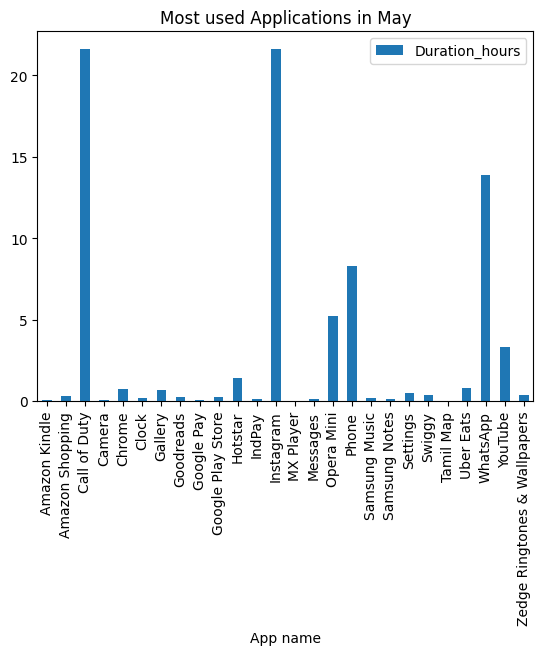

In [47]:
# Convert 'Duration' to timedelta type and create a new column for duration in hours hence we divided by 3600 because 1 hour = 3600 seconds
randomdf = may_DataFrame
randomdf['Duration_hours'] = pd.to_timedelta(randomdf['Duration']).dt.total_seconds() / 3600


randomdf.groupby('App name')['Duration_hours'].sum().plot(kind='bar',title='Most used Applications in May',legend=True)

C:\Users\a2004\AppData\Local\Temp\ipykernel_19588\1917934186.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  randomdf['Duration_hours'] = pd.to_timedelta(randomdf['Duration']).dt.total_seconds() / 3600


<Axes: title={'center': 'Most used Applications in June'}, xlabel='App name'>

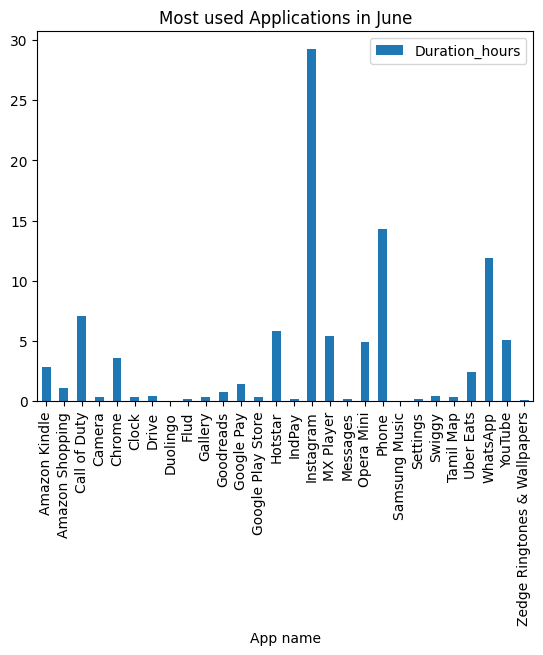

In [48]:
# Convert 'Duration' to timedelta type and create a new column for duration in hours hence we divided by 3600 because 1 hour = 3600 seconds
randomdf = june_DataFrame
randomdf['Duration_hours'] = pd.to_timedelta(randomdf['Duration']).dt.total_seconds() / 3600


randomdf.groupby('App name')['Duration_hours'].sum().plot(kind='bar',title='Most used Applications in June',legend=True)

C:\Users\a2004\AppData\Local\Temp\ipykernel_19588\3724402275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  randomdf['Duration'] = pd.to_timedelta(randomdf['Duration']).dt.total_seconds() /3600


<Axes: title={'center': 'Most used Applications in July'}, xlabel='App name'>

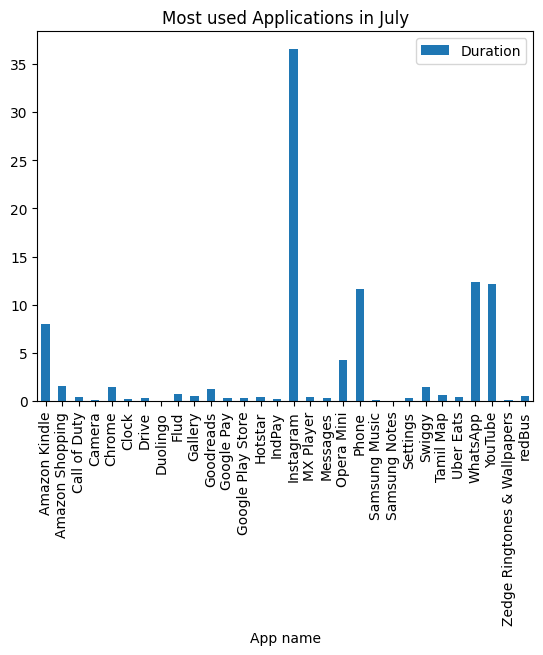

In [49]:
# Convert 'Duration' to timedelta type and create a new column for duration in hours hence we divided by 3600 because 1 hour = 3600 seconds

randomdf = july_DataFrame
randomdf['Duration'] = pd.to_timedelta(randomdf['Duration']).dt.total_seconds() /3600


randomdf.groupby('App name')['Duration'].sum().plot(kind='bar',title='Most used Applications in July',legend=True)

C:\Users\a2004\AppData\Local\Temp\ipykernel_19588\229118894.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  randomdf['Duration'] = pd.to_timedelta(randomdf['Duration']).dt.total_seconds() /3600


<Axes: title={'center': 'Most used Applications in August'}, xlabel='App name'>

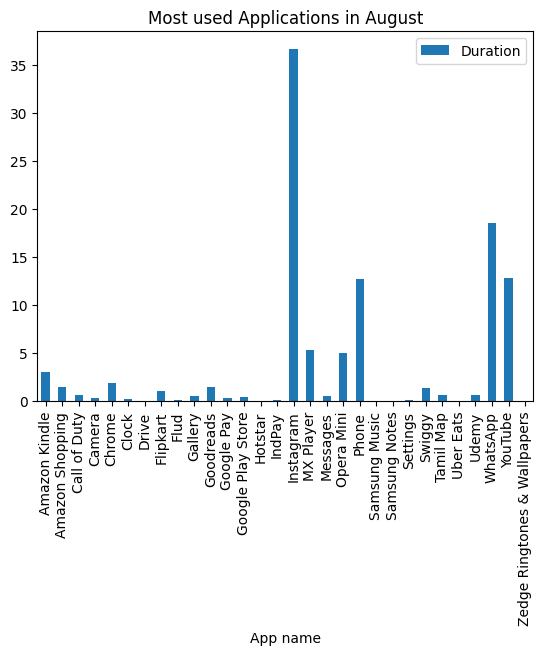

In [50]:
# Convert 'Duration' to timedelta type and create a new column for duration in hours hence we divided by 3600 because 1 hour = 3600 seconds

randomdf = august_DataFrame
randomdf['Duration'] = pd.to_timedelta(randomdf['Duration']).dt.total_seconds() /3600


randomdf.groupby('App name')['Duration'].sum().plot(kind='bar',title='Most used Applications in August',legend=True)

C:\Users\a2004\AppData\Local\Temp\ipykernel_19588\1267565717.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  randomdf['Duration'] = pd.to_timedelta(randomdf['Duration']).dt.total_seconds() /3600


<Axes: title={'center': 'Most used Applications September'}, xlabel='App name'>

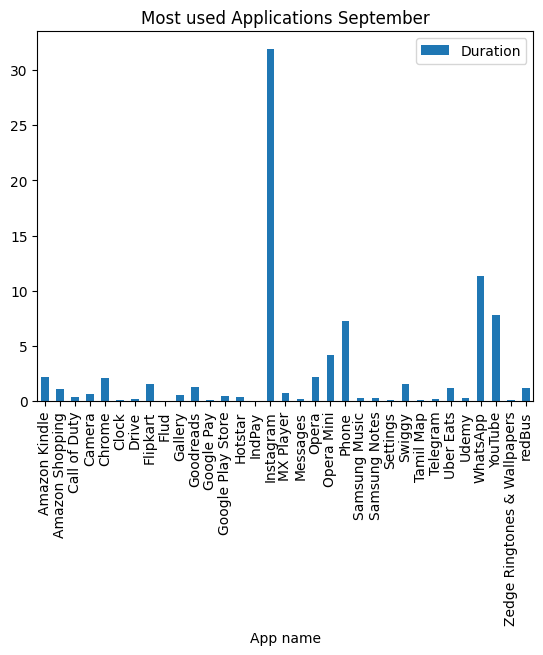

In [51]:
# Convert 'Duration' to timedelta type and create a new column for duration in hours hence we divided by 3600 because 1 hour = 3600 seconds

randomdf = september_DataFrame
randomdf['Duration'] = pd.to_timedelta(randomdf['Duration']).dt.total_seconds() /3600

randomdf.groupby('App name')['Duration'].sum().plot(kind='bar',title='Most used Applications September',legend=True)

C:\Users\a2004\AppData\Local\Temp\ipykernel_19588\526239933.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  randomdf['Duration'] = pd.to_timedelta(randomdf['Duration']).dt.total_seconds() /3600


<Axes: title={'center': 'Most used Applications in October'}, xlabel='App name'>

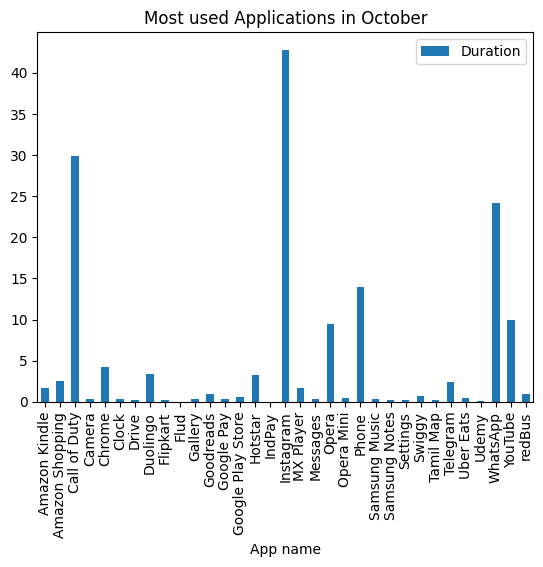

In [52]:
# Convert 'Duration' to timedelta type and create a new column for duration in hours hence we divided by 3600 because 1 hour = 3600 seconds

randomdf = october_DataFrame
randomdf['Duration'] = pd.to_timedelta(randomdf['Duration']).dt.total_seconds() /3600


randomdf.groupby('App name')['Duration'].sum().plot(kind='bar',title='Most used Applications in October',legend=True)

C:\Users\a2004\AppData\Local\Temp\ipykernel_19588\736012522.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  randomdf['Duration'] = pd.to_timedelta(randomdf['Duration']).dt.total_seconds() /3600


<Axes: title={'center': 'Most used Applications November in hours'}, xlabel='App name'>

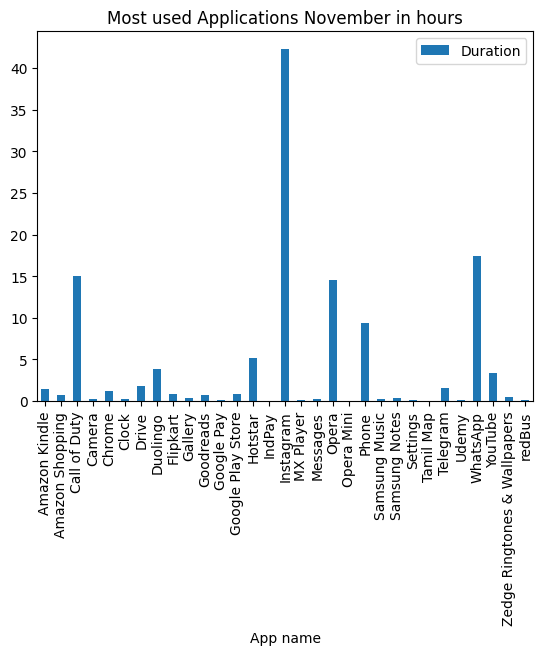

In [53]:
# Convert 'Duration' to timedelta type and create a new column for duration in hours hence we divided by 3600 because 1 hour = 3600 seconds

randomdf = november_DataFrame
randomdf['Duration'] = pd.to_timedelta(randomdf['Duration']).dt.total_seconds() /3600

# Now you can perform summation
randomdf.groupby('App name')['Duration'].sum().plot(kind='bar',title='Most used Applications November in hours',legend=True)

**convert dates to days of the week**

In [54]:


# Convert 'Date' to datetime type
df_detailed_phone_usage.index= pd.to_datetime(df_detailed_phone_usage.index, format='%d/%m/%Y')

# Create a new column for the day of the week
df_detailed_phone_usage['Day_of_week'] = df_detailed_phone_usage.index.day_name()
df_detailed_phone_usage.to_csv('detailed_phone_usage_cleaned.csv')

C:\Users\a2004\AppData\Local\Temp\ipykernel_19588\2126875695.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Hour_df['Hour'] = pd.to_datetime(Hour_df['Time']).dt.hour


<Axes: title={'center': 'App Usage by Hour'}, xlabel='Hour'>

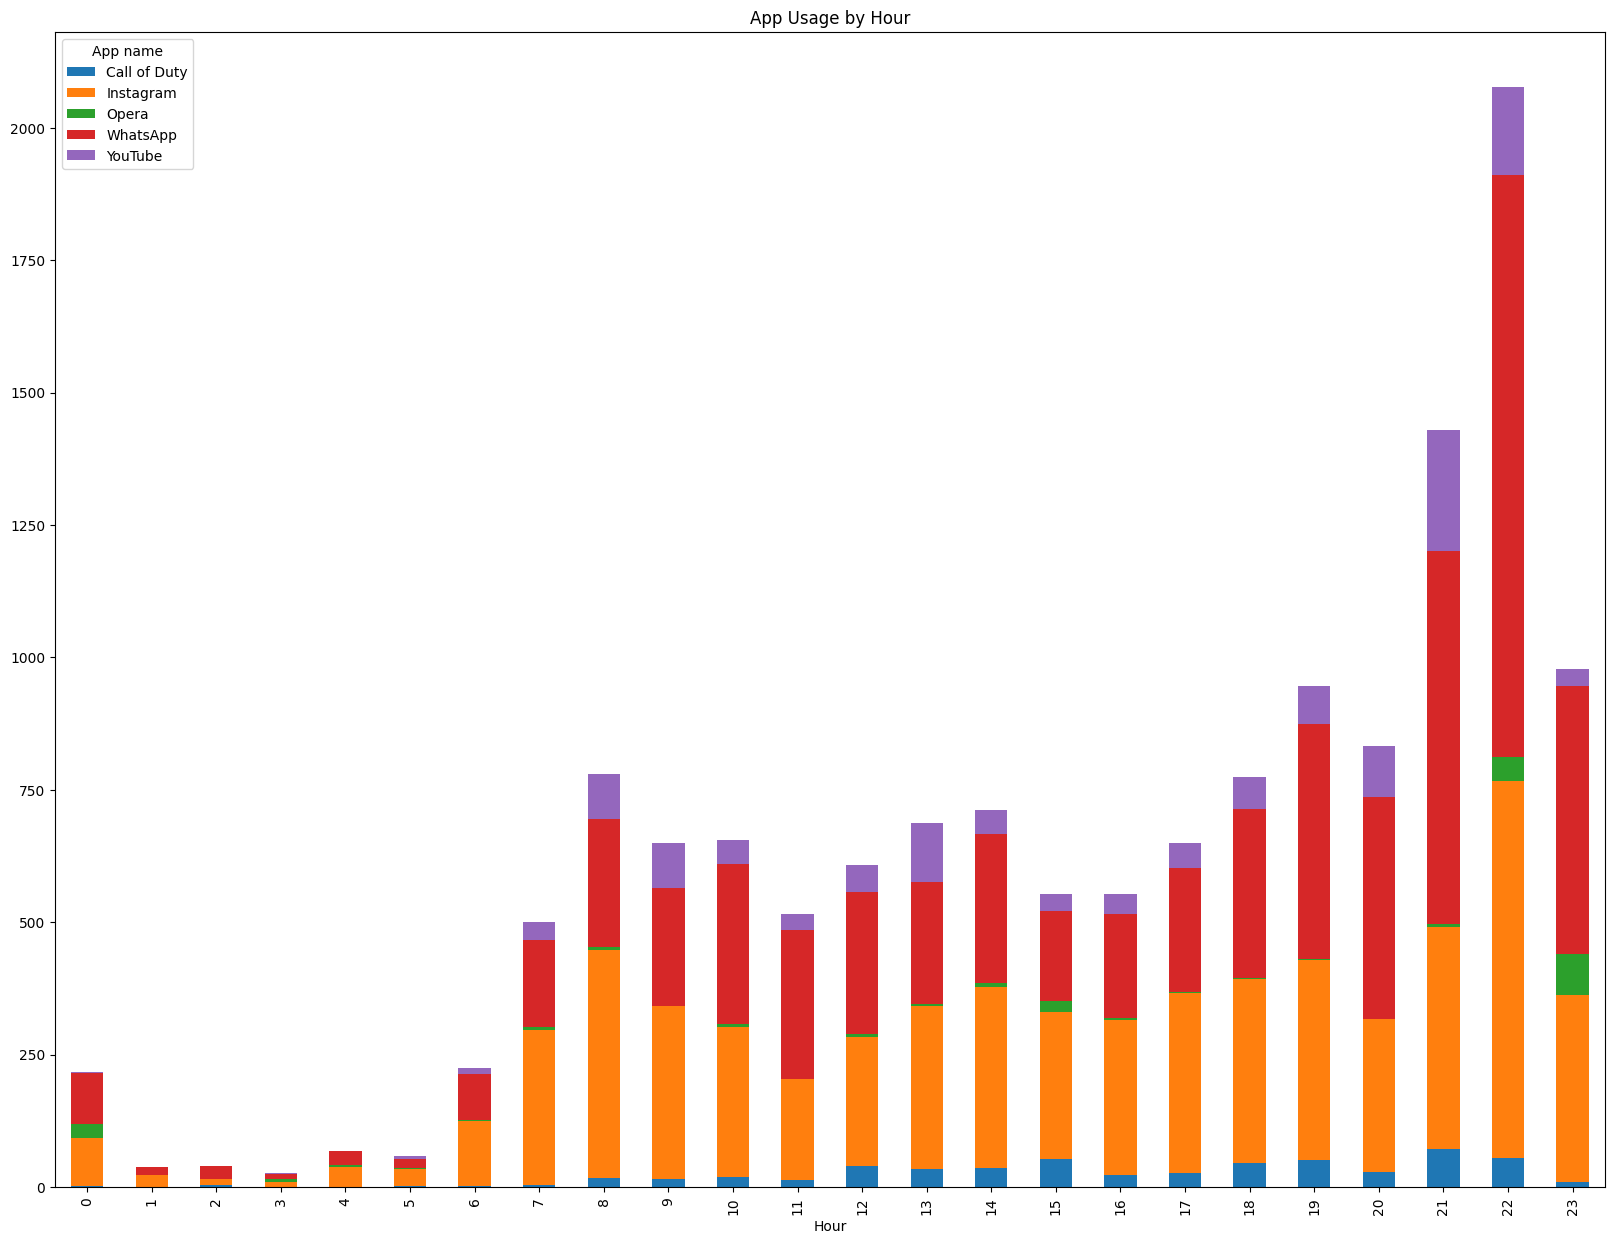

In [55]:

# Load the data
Hour_df = pd.read_csv('detailed_phone_usage_cleaned.csv')

# Convert 'Time' to datetime type and extract hour
Hour_df['Hour'] = pd.to_datetime(Hour_df['Time']).dt.hour


mostusedapps = ['YouTube','Instagram','WhatsApp','Call of Duty','Opera']

Hour_df= Hour_df[Hour_df['App name'].isin(mostusedapps)]

# Group by 'App name' and 'Hour', count the number of occurrences, and reset index
usage_by_hour = Hour_df.groupby(['App name', 'Hour']).size().reset_index(name='Count')

# Pivot the data for visualization
usage_by_hour_pivot = usage_by_hour.pivot(index='Hour', columns='App name', values='Count')

# Plot the data
usage_by_hour_pivot.plot(kind='bar', stacked=True, title='App Usage by Hour',figsize=(20,15))

legend and bar colors are in reverse order.
first color in legend in the first color from the top of the bar - most used 

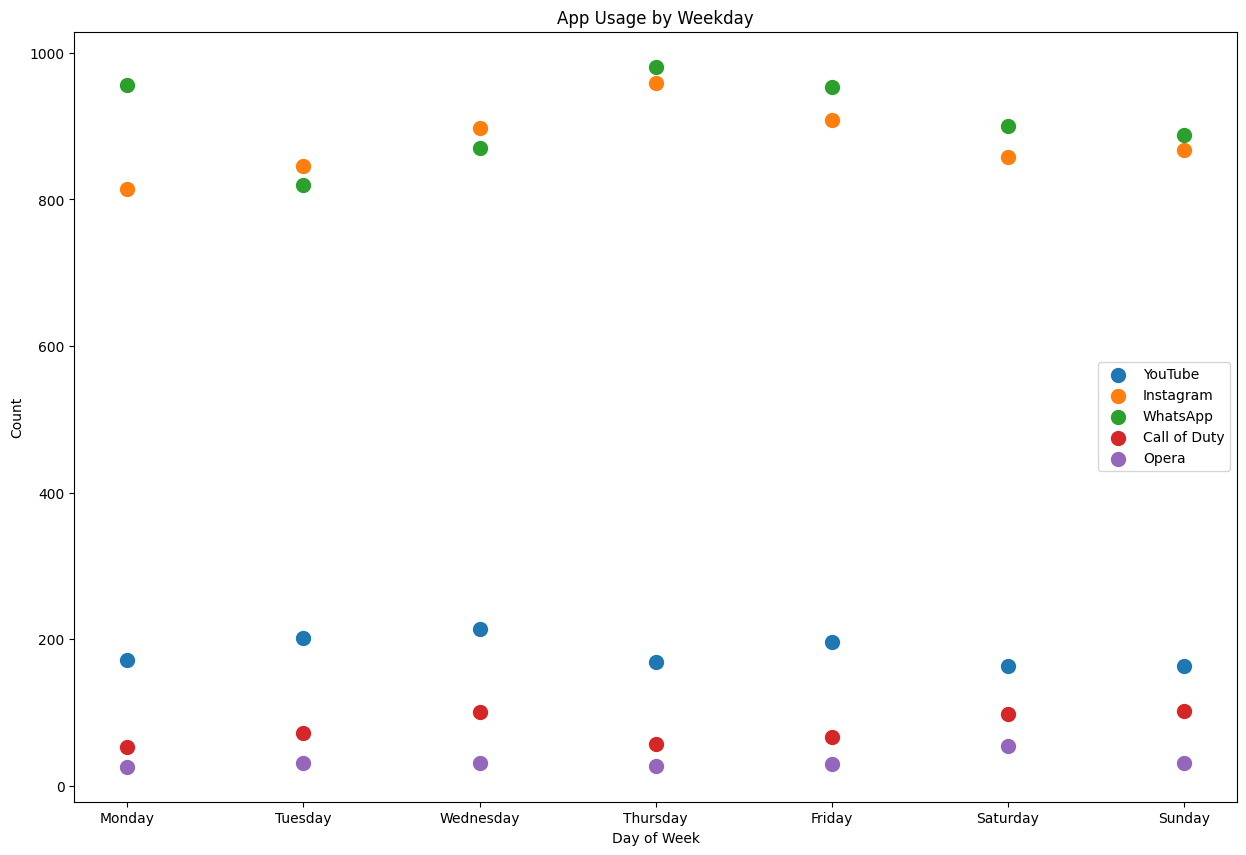

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

mostusedapps = ['YouTube','Instagram','WhatsApp','Call of Duty','Opera']

# Group by 'App name' and 'Day_of_week', count the number of occurrences, and reset index
usage_by_day = df_detailed_phone_usage.groupby(['App name', 'Day_of_week']).size().reset_index(name='Count')

usage_by_day = usage_by_day[usage_by_day['App name'].isin(mostusedapps)]
# Filter for weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']

usage_weekdays = usage_by_day[usage_by_day['Day_of_week'].isin(weekdays)]

# Pivot the data for visualization
usage_weekdays_pivot = usage_weekdays.pivot(index='Day_of_week', columns='App name', values='Count')

# Convert the 'Day_of_week' index to a categorical type with ordered categories
usage_weekdays_pivot.index = pd.CategoricalIndex(usage_weekdays_pivot.index, categories=weekdays, ordered=True)

# Sort the DataFrame by the 'Day_of_week' index
usage_weekdays_pivot.sort_index(inplace=True)

# Create a scatter plot for each app with larger markers
plt.figure(figsize=(15,10))
for app in mostusedapps:
    plt.scatter(usage_weekdays_pivot.index, usage_weekdays_pivot[app], label=app, s=100)  # Increase the marker size with the `s` parameter

plt.title('App Usage by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend()
plt.show()

Begin: merging

In [57]:
mergeddataset = pd.read_csv('app_usage_cleaned.csv')
mergeddataset

,App name,Usage (hours),Access count
0,Instagram,329,6141
1,WhatsApp,145,6366
2,Phone,105,5843
3,Call of Duty,85,545
4,YouTube,82,1275
5,Opera Mini,43,501
6,Amazon Kindle,26,411
7,Opera,26,230
8,Chrome,22,1256
9,Hotstar,18,440


In [58]:

mostusedapps = mergeddataset['App name'].tolist()
# Calculate the average time per access for each app in minutes and add it as a new column
for app in mostusedapps:
    sum_usage_hours = mergeddataset[mergeddataset['App name'] == app]['Usage (hours)'].sum() * 60
    sum_access_count  = mergeddataset[mergeddataset['App name'] == app]['Access count'].sum()
    average_time_per_access = sum_usage_hours / sum_access_count
    mergeddataset.loc[mergeddataset['App name'] == app, 'average_time_per_access (Minutes)'] = average_time_per_access

mergeddataset

,App name,Usage (hours),Access count,average_time_per_access (Minutes)
0,Instagram,329,6141,3.214460
1,WhatsApp,145,6366,1.366635
2,Phone,105,5843,1.078213
3,Call of Duty,85,545,9.357798
4,YouTube,82,1275,3.858824
5,Opera Mini,43,501,5.149701
6,Amazon Kindle,26,411,3.795620
7,Opera,26,230,6.782609
8,Chrome,22,1256,1.050955
9,Hotstar,18,440,2.454545


In [59]:
from datetime import datetime

start_date = datetime(2019, 5, 17)
end_date = datetime(2019, 11, 26)

total_days = (end_date - start_date).days
#193 days

for app in mostusedapps:
    # Calculate the average time per day for each app in hours and add it as a new column then multiply by 60 to ge tthe minutes
    usage_hours = mergeddataset[mergeddataset['App name'] == app]['Usage (hours)'] * 60
 
    average_time_per_day = usage_hours/ total_days
    mergeddataset.loc[mergeddataset['App name'] == app, 'average_time_per_day (Minutes)'] = average_time_per_day


In [60]:
mergeddataset.reset_index(drop=True, inplace=True)


In [61]:
mergeddataset

,App name,Usage (hours),Access count,average_time_per_access (Minutes),average_time_per_day (Minutes)
0,Instagram,329,6141,3.214460,102.279793
1,WhatsApp,145,6366,1.366635,45.077720
2,Phone,105,5843,1.078213,32.642487
3,Call of Duty,85,545,9.357798,26.424870
4,YouTube,82,1275,3.858824,25.492228
5,Opera Mini,43,501,5.149701,13.367876
6,Amazon Kindle,26,411,3.795620,8.082902
7,Opera,26,230,6.782609,8.082902
8,Chrome,22,1256,1.050955,6.839378
9,Hotstar,18,440,2.454545,5.595855


In [62]:

mergeddataset.to_csv('MergedFinal.csv', index=False)

the categories are added manually - check the data set folder to see the merged file with the category names 